## Prep

In [8]:
import numpy as np

xdata = np.array([0.143, 0.2, 0.343, 0.429, 0.486, 0.571, 0.714, 0.771, 0.857, 1.0])
ydata = np.array([0.2, 0.25, 0.38, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1])

N_points = 20
new_xdata = np.linspace(xdata[0], xdata[-1], N_points)
new_ydata = np.interp(new_xdata, xdata, ydata)

new_xdata = [round(x, 3) for x in new_xdata]
new_ydata = [round(x, 3) for x in new_ydata]

print(new_xdata)
print(new_ydata)

[0.143, 0.188, 0.233, 0.278, 0.323, 0.369, 0.414, 0.459, 0.504, 0.549, 0.594, 0.639, 0.684, 0.729, 0.774, 0.82, 0.865, 0.91, 0.955, 1.0]
[0.2, 0.24, 0.28, 0.321, 0.362, 0.416, 0.479, 0.552, 0.621, 0.674, 0.716, 0.748, 0.779, 0.827, 0.902, 0.928, 0.953, 0.968, 0.984, 1.0]


## Sigmoid

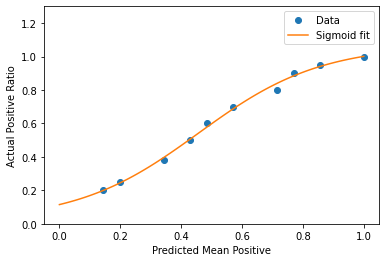

In [12]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt


xdata = np.array([0.143, 0.2, 0.343, 0.429, 0.486, 0.571, 0.714, 0.771, 0.857, 1.0])
ydata = np.array([0.2, 0.25, 0.38, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1])


def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')



x = np.linspace(0, 1, 100)
y = sigmoid(x, *popt)

plt.plot(xdata, ydata, 'o', label='Data')
plt.plot(x,y, label='Sigmoid fit')
plt.ylim(0, 1.3)
plt.legend(loc='best')
plt.xlabel("Predicted Mean Positive")
plt.ylabel("Actual Positive Ratio")
plt.show()

## Isotonic

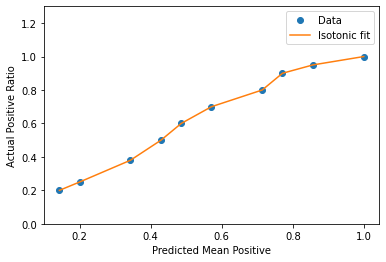

In [13]:
import numpy as np
from sklearn.isotonic import IsotonicRegression
import matplotlib.pyplot as plt

xdata = np.array([0.143, 0.2, 0.343, 0.429, 0.486, 0.571, 0.714, 0.771, 0.857, 1.0])
ydata = np.array([0.2, 0.25, 0.38, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1])

iso_reg = IsotonicRegression()
iso_reg.fit(xdata, ydata)

y_pred = iso_reg.predict(xdata)
y = y_pred

plt.plot(xdata, ydata, 'o', label='Data')
plt.plot(xdata, y, label='Isotonic fit')
plt.ylim(0, 1.3)
plt.legend(loc='best')
plt.xlabel("Predicted Mean Positive")
plt.ylabel("Actual Positive Ratio")
plt.show()

## One Plot

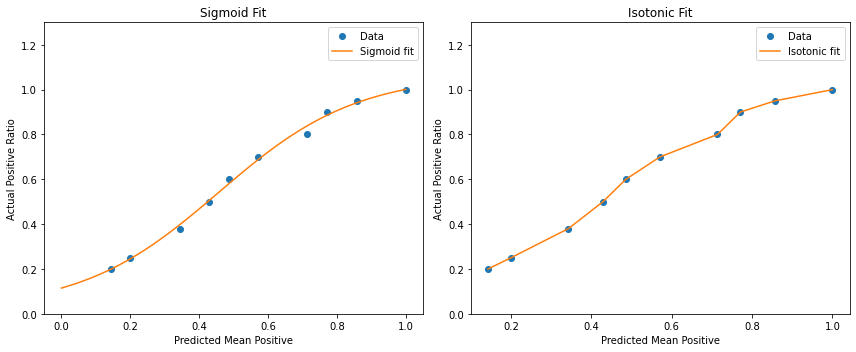

In [15]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.isotonic import IsotonicRegression

xdata = np.array([0.143, 0.2, 0.343, 0.429, 0.486, 0.571, 0.714, 0.771, 0.857, 1.0])
ydata = np.array([0.2, 0.25, 0.38, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1])

def sigmoid(x, L, x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return y

p0 = [max(ydata), np.median(xdata), 1, min(ydata)]

popt, pcov = curve_fit(sigmoid, xdata, ydata, p0, method='dogbox')

iso_reg = IsotonicRegression()
iso_reg.fit(xdata, ydata)
y_pred = iso_reg.predict(xdata)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(xdata, ydata, 'o', label='Data')
ax1.plot(x, sigmoid(x, *popt), label='Sigmoid fit')
ax1.set_ylim(0, 1.3)
ax1.legend(loc='best')
ax1.set_xlabel("Predicted Mean Positive")
ax1.set_ylabel("Actual Positive Ratio")
ax1.set_title('Sigmoid Fit')

ax2.plot(xdata, ydata, 'o', label='Data')
ax2.plot(xdata, y_pred, label='Isotonic fit')
ax2.set_ylim(0, 1.3)
ax2.legend(loc='best')
ax2.set_xlabel("Predicted Mean Positive")
ax2.set_ylabel("Actual Positive Ratio")
ax2.set_title('Isotonic Fit')

plt.tight_layout()
plt.show()